Data Preprocessing
The main objective of preprocessing is:
1. checking data set for irrelavent columns which not serve our prediction of length of stay model and deal with it.
2. Handling Categorical Variables:
3. Correlation heatmap after encoding to chech if there are tow features highly correlated to each other & drop one of them.
4. Checking for duplication
5. saving ready encoded and scaled csv file for next modeling step. 

About Dataset:
This dataset is about inpatient discharged from hospitals of state of New York provided by the Dept of Health of New York state for the year of 2015.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler,robust_scale
from sklearn.model_selection import train_test_split
import joblib

In [2]:
# loading the dataset.
data = pd.read_csv('../data/processed/cleaned_data.csv')

In [3]:
# getting copy of the data set
df = data.copy()

In [4]:
# Geitting Information about the Data
df.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331584 entries, 0 to 2331583
Data columns (total 31 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   health_service_area                  2331584 non-null  object 
 1   hospital_county                      2331584 non-null  object 
 2   operating_certificate_number         2331584 non-null  float64
 3   facility_id                          2331584 non-null  float64
 4   facility_name                        2331584 non-null  object 
 5   age_group                            2331584 non-null  object 
 6   zip_code__3_digits                   2331584 non-null  int64  
 7   gender                               2331584 non-null  object 
 8   race                                 2331584 non-null  object 
 9   ethnicity                            2331584 non-null  object 
 10  length_of_stay                       2331584 non-null  int64  
 11

In [5]:
#checking for duplication in data 
df.duplicated().sum()

0

In [6]:
# veiwing the head of the data the first 5 rows
pd.set_option('display.max_columns', None)  # This will display all columns
df.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code__3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,birth_weight,emergency_department_indicator,total_charges,total_costs,over_120_stay
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,5,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,5620.00,4561.28,0
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,0,Y,7404.18,6933.94,0
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,7931.28,7154.85,0
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,128,Asthma,0,NO PROC,141,Asthma,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,0,Y,11304.44,4584.11,0
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,83,Epilepsy; convulsions,0,NO PROC,53,Seizure,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,Medicaid,0,Y,8330.50,4361.74,0


* From the above and by puting the aim of our model in mind we can noticed that:

Not all the feature will serve our aim as we try to make general model could predict patient length of stay regard less of the city or state also as total cost also stay over 120 and chrges comes at the end of stay they don't make sence to keep them. then the following columns not usefull for the aim of this model it is better to be droped: ('health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity','zip_code__3_digits', 'patient_disposition','payment_typology_1','total_charges','total_costs','over_120_stay')

In [7]:
# dropping unnecessary columns for the model from data frame
df.drop(['health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity','zip_code__3_digits','patient_disposition','payment_typology_1','total_charges','total_costs','over_120_stay'],axis=1, inplace=True)

In [8]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,birth_weight,emergency_department_indicator
0,50 to 69,F,5,Emergency,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,0,Y
1,18 to 29,F,8,Emergency,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,0,Y
2,30 to 49,M,8,Emergency,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,0,Y
3,50 to 69,F,4,Emergency,128,Asthma,0,NO PROC,141,Asthma,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,0,Y
4,50 to 69,M,3,Emergency,83,Epilepsy; convulsions,0,NO PROC,53,Seizure,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,0,Y


In [9]:
# checking features value counts.
for i in list(df.columns):
    print(i)
    print(df[i].value_counts())
    print("*"*100)

age_group
50 to 69       644707
70 or Older    643077
30 to 49       456116
0 to 17        342237
18 to 29       245447
Name: age_group, dtype: int64
****************************************************************************************************
gender
F    1297197
M    1034387
Name: gender, dtype: int64
****************************************************************************************************
length_of_stay
2      533916
3      422700
1      336530
4      247261
5      160516
        ...  
111        41
119        41
115        37
116        31
108        26
Name: length_of_stay, Length: 120, dtype: int64
****************************************************************************************************
type_of_admission
Emergency        1484292
Elective          446216
Newborn           217340
Urgent            176175
Trauma              6391
Not Available       1170
Name: type_of_admission, dtype: int64
****************************************************************

Y    1365513
N     966071
Name: emergency_department_indicator, dtype: int64
****************************************************************************************************


In [10]:
# checking features n unique.
for i in list(df.columns):
    print(i)
    print(df[i].nunique())
    print("*"*100)

age_group
5
****************************************************************************************************
gender
2
****************************************************************************************************
length_of_stay
120
****************************************************************************************************
type_of_admission
6
****************************************************************************************************
ccs_diagnosis_code
263
****************************************************************************************************
ccs_diagnosis_description
263
****************************************************************************************************
ccs_procedure_code
232
****************************************************************************************************
ccs_procedure_description
232
****************************************************************************************************
apr_drg_code
314
*********

### First encoding oridinal feature: 
By creating dictionary with ordinal number and maping the dictionary with the ordinal categorical feature

In [11]:
# age_group:
dict_age_group = {'0 to 17':1, '18 to 29':2, '30 to 49':3, '50 to 69':4, '70 or Older':5}
# maping age goup dictionary
df['age_group'] = df['age_group'].map(dict_age_group)

In [12]:
df['age_group'].unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [13]:
# apr_severity_of_illness_description Already encoded by apr_severity_of_illness_code but we will made dictionery for it.
dict_apr_severity_of_illness_description = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df.apr_severity_of_illness_description = df.apr_severity_of_illness_description.map(dict_apr_severity_of_illness_description)
df.apr_severity_of_illness_description.unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
# then drop the apr_severity_of_illness_code as it is no longer needed
df.drop('apr_severity_of_illness_code',axis=1,inplace=True)

In [15]:
# apr_risk_of_mortality:
dict_apr_risk_of_mortality = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df["apr_risk_of_mortality"] = df["apr_risk_of_mortality"].map(dict_apr_risk_of_mortality)

In [16]:
df["apr_risk_of_mortality"].unique()

array([1, 2, 3, 4], dtype=int64)

### Second encoding nominal feature:
* For Features with high cardinality we are going to use Target Encoding (Mean Encoding) then dropping it:
  - (ccs_diagnosis_description: 263 unique, ccs_procedure_description: 232, apr_drg_description: 314, apr_mdc_description: 25 unique values)     


* For features with low cardinality we are going to use get dumies to encode it features like:

  - (gender: 2 unique, type_of_admission: 6, apr_medical_surgical_description: 2, emergency_department_indicator: 2) 

#### * First high cardinality categorical Features

In [17]:
# Target Encoding (Mean Encoding) for (ccs_diagnosis_description: 263 unique values:
dict_ccs_diagnosis_description=round(df.groupby('ccs_diagnosis_description')['length_of_stay'].mean()).to_dict()

In [18]:
dict_ccs_diagnosis_description

{'Abdominal hernia': 5.0,
 'Abdominal pain': 3.0,
 'Acquired foot deformities': 4.0,
 'Acute and chronic tonsillitis': 2.0,
 'Acute and unspecified renal failure': 7.0,
 'Acute bronchitis': 3.0,
 'Acute cerebrovascular disease': 7.0,
 'Acute myocardial infarction': 5.0,
 'Acute posthemorrhagic anemia': 4.0,
 'Adjustment disorders': 5.0,
 'Administrative/social admission': 11.0,
 'Alcohol-related disorders': 6.0,
 'Allergic reactions': 3.0,
 'Anal and rectal conditions': 4.0,
 'Anxiety disorders': 6.0,
 'Aortic and peripheral arterial embolism or thrombosis': 8.0,
 'Aortic; peripheral; and visceral artery aneurysms': 6.0,
 'Appendicitis and other appendiceal conditions': 3.0,
 'Aspiration pneumonitis; food/vomitus': 8.0,
 'Asthma': 3.0,
 'Attention-deficit, conduct, and disruptive behavior disorders': 11.0,
 'Bacterial infection; unspecified site': 7.0,
 'Benign neoplasm of uterus': 2.0,
 'Biliary tract disease': 4.0,
 'Birth trauma': 8.0,
 'Blindness and vision defects': 3.0,
 'Burns':

In [19]:
# encoding using maping dict_ccs_diagnosis_description
df['ccs_diagnosis_description'] = df['ccs_diagnosis_description'].map(dict_ccs_diagnosis_description)

In [20]:
# Target Encoding (Mean Encoding) for (ccs_procedure_description: 232 unique values):
dict_ccs_procedure_description=round(df.groupby('ccs_procedure_description')['length_of_stay'].mean()).to_dict()
dict_ccs_procedure_description

{'ABDOMINAL PARACENTESIS': 8.0,
 'ABORTION (TERM OF PREG)': 6.0,
 'ALCO/DRUG REHAB/DETOX': 7.0,
 'AMPUTATE LOWER EXTRMITY': 13.0,
 'AORTIC RESECTION; REPL': 6.0,
 'APPENDECTOMY': 3.0,
 'ART RUPT MEMB ASSIS DLV': 2.0,
 'ARTERIAL BLOOD GASES': 4.0,
 'ARTERIO FEMORAL/LOW ART': 7.0,
 'ARTERIO/VENOGRAM-NOT HH': 6.0,
 'ARTERIOVENOUS FISTULA': 13.0,
 'ARTHROCENTESIS': 7.0,
 'ARTHROPLASTY KNEE': 3.0,
 'ARTHROPLASTY-NOT HIP/KN': 2.0,
 'ARTHROSCOPY': 4.0,
 'BIOPSY OF LIVER': 9.0,
 'BLOOD TRANSFUSION': 6.0,
 'BONE MARROW BIOPSY': 17.0,
 'BONE MARROW TRANSPLANT': 28.0,
 'BREAST BIOPSY & DX PRCS': 8.0,
 'BUNIONECTOMY/TOE DEFORM': 4.0,
 'CANCER CHEMOTHERAPY': 7.0,
 'CARDIAC PACEMAKER/DEFIB': 6.0,
 'CARDIAC STRESS TESTS': 3.0,
 'CEREBRAL ARTERIOGRAM': 6.0,
 'CESAREAN SECTION': 4.0,
 'CHOLECYSTECTOMY/EXPLOR': 4.0,
 'CIRCUMCISION': 3.0,
 'COLONOSCOPY AND BIOPSY': 6.0,
 'COLORECTAL RESECTION': 9.0,
 'COLOSTOMY; TEMP/PERM': 14.0,
 'COMP AXIAL TOMOGR (CT)': 4.0,
 'CONTRAST AORTOGRAM': 7.0,
 'CONTROL OF EP

In [21]:
# encoding using maping dict_ccs_diagnosis_description
df['ccs_procedure_description'] = df['ccs_procedure_description'].map(dict_ccs_procedure_description)

In [22]:
# Target Encoding (Mean Encoding) for (apr_drg_description: 314 unique values):
dict_apr_drg_description=round(df.groupby('apr_drg_description')['length_of_stay'].mean()).to_dict()
dict_apr_drg_description

{'Abdominal pain': 3.0,
 'Abortion w/o D&C, aspiration curettage or hysterotomy': 2.0,
 'Acute & subacute endocarditis': 11.0,
 'Acute anxiety & delirium states': 5.0,
 'Acute leukemia': 19.0,
 'Acute major eye infections': 5.0,
 'Acute myocardial infarction': 4.0,
 'Adjustment disorders & neuroses except depressive diagnoses': 6.0,
 'Alcohol & drug dependence w rehab or rehab/detox therapy': 17.0,
 'Alcohol abuse & dependence': 5.0,
 'Alcoholic liver disease': 7.0,
 'Allergic reactions': 3.0,
 'Amputation of lower limb except toes': 14.0,
 'Anal procedures': 4.0,
 'Angina pectoris & coronary atherosclerosis': 2.0,
 'Appendectomy': 3.0,
 'Asthma': 3.0,
 'BPD & oth chronic respiratory diseases arising in perinatal period': 9.0,
 'Bacterial & tuberculous infections of nervous system': 11.0,
 'Behavioral disorders': 10.0,
 'Bipolar disorders': 11.0,
 'Bone marrow transplant': 29.0,
 'Brain contusion/laceration & complicated skull Fx, coma < 1 hr or no coma': 5.0,
 'Breast procedures excep

In [23]:
# encoding using maping dict_ccs_diagnosis_description
df['apr_drg_description'] = df['apr_drg_description'].map(dict_apr_drg_description)

In [24]:
# Target Encoding (Mean Encoding) for ( apr_mdc_description: 25 unique values):
dict_apr_mdc_description = round(df.groupby('apr_mdc_description')['length_of_stay'].mean()).to_dict()
dict_apr_mdc_description

{'Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders': 6.0,
 'Burns': 8.0,
 'Diseases and Disorders of Blood, Blood Forming Organs and Immunological Disorders': 5.0,
 'Diseases and Disorders of the Circulatory System': 5.0,
 'Diseases and Disorders of the Digestive System': 5.0,
 'Diseases and Disorders of the Eye': 4.0,
 'Diseases and Disorders of the Female Reproductive System': 3.0,
 'Diseases and Disorders of the Hepatobiliary System and Pancreas': 6.0,
 'Diseases and Disorders of the Kidney and Urinary Tract': 5.0,
 'Diseases and Disorders of the Male Reproductive System': 4.0,
 'Diseases and Disorders of the Musculoskeletal System and Conn Tissue': 5.0,
 'Diseases and Disorders of the Nervous System': 6.0,
 'Diseases and Disorders of the Respiratory System': 6.0,
 'Diseases and Disorders of the Skin, Subcutaneous Tissue and Breast': 5.0,
 'Ear, Nose, Mouth, Throat and Craniofacial Diseases and Disorders': 4.0,
 'Endocrine, Nutritional and Metabolic Diseases and Di

In [25]:
# encoding using maping dict_apr_mdc_description
df['apr_mdc_description'] =df['apr_mdc_description'].map(dict_apr_mdc_description)

In [26]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,birth_weight,emergency_department_indicator
0,4,F,5,Emergency,657,10.0,0,5.0,753,11.0,19,12.0,1,1,Medical,0,Y
1,2,F,8,Emergency,657,10.0,0,5.0,753,11.0,19,12.0,2,1,Medical,0,Y
2,3,M,8,Emergency,657,10.0,0,5.0,753,11.0,19,12.0,1,1,Medical,0,Y
3,4,F,4,Emergency,128,3.0,0,5.0,141,3.0,4,6.0,1,1,Medical,0,Y
4,4,M,3,Emergency,83,4.0,0,5.0,53,4.0,1,6.0,2,2,Medical,0,Y


In [27]:
# dropping the folloing columns ['ccs_diagnosis_code','ccs_procedure_code','apr_drg_code','apr_mdc_code']
df.drop(['ccs_diagnosis_code','ccs_procedure_code','apr_drg_code','apr_mdc_code'],axis=1,inplace=True)

#### * Second low cardinality categorical Features:
For features with low cardinality we are going to use get dumies to encode it features like:

  - (gender: 2 unique values, type_of_admission: 6, apr_medical_surgical_description: 2, emergency_department_indicator: 2)

In [28]:
# Making list for low cardinality features to help in preparing dict after encoded it.
gender_list = df.gender.unique().tolist()
type_of_admission_list = df.type_of_admission.unique().tolist()
apr_medical_surgical_description_list = df.apr_medical_surgical_description.unique().tolist()
emergency_department_indicator_list = df.emergency_department_indicator.unique().tolist()

In [29]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,birth_weight,emergency_department_indicator
0,4,F,5,Emergency,10.0,5.0,11.0,12.0,1,1,Medical,0,Y
1,2,F,8,Emergency,10.0,5.0,11.0,12.0,2,1,Medical,0,Y
2,3,M,8,Emergency,10.0,5.0,11.0,12.0,1,1,Medical,0,Y
3,4,F,4,Emergency,3.0,5.0,3.0,6.0,1,1,Medical,0,Y
4,4,M,3,Emergency,4.0,5.0,4.0,6.0,2,2,Medical,0,Y


In [30]:
df = pd.get_dummies(df,drop_first=True)

In [31]:
df.head()

,age_group,length_of_stay,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,birth_weight,gender_M,type_of_admission_Emergency,type_of_admission_Newborn,type_of_admission_Not Available,type_of_admission_Trauma,type_of_admission_Urgent,apr_medical_surgical_description_Surgical,emergency_department_indicator_Y
0,4,5,10.0,5.0,11.0,12.0,1,1,0,0,1,0,0,0,0,0,1
1,2,8,10.0,5.0,11.0,12.0,2,1,0,0,1,0,0,0,0,0,1
2,3,8,10.0,5.0,11.0,12.0,1,1,0,1,1,0,0,0,0,0,1
3,4,4,3.0,5.0,3.0,6.0,1,1,0,0,1,0,0,0,0,0,1
4,4,3,4.0,5.0,4.0,6.0,2,2,0,1,1,0,0,0,0,0,1


In [32]:
dict_gender = {'F':0,'M':1}
dict_type_of_admission = {'Emergency':[1,0,0,0,0], 'Urgent':[0,0,0,0,1], 'Elective':[0,0,0,0,0], 'Not Available':[0,0,1,0,0], 'Trauma':[0,0,0,1,0], 'Newborn':[0,1,0,0,0]}
dict_apr_medical_surgical_description_list = {'Medical':0, 'Surgical':1}
dict_emergency_department_indicator_list = {'Y':1, 'N':0}

In [33]:
# I am interested in take a look at correlation matrics after features encoded:
corr_mat = round(df.corr()['length_of_stay'].sort_values(ascending=False),2)
corr_mat

length_of_stay                               1.00
apr_drg_description                          0.54
ccs_procedure_description                    0.39
ccs_diagnosis_description                    0.36
apr_severity_of_illness_description          0.35
apr_risk_of_mortality                        0.30
apr_mdc_description                          0.28
age_group                                    0.11
type_of_admission_Emergency                  0.07
gender_M                                     0.05
emergency_department_indicator_Y             0.05
apr_medical_surgical_description_Surgical    0.03
type_of_admission_Urgent                     0.02
type_of_admission_Trauma                     0.01
type_of_admission_Not Available              0.00
birth_weight                                -0.06
type_of_admission_Newborn                   -0.07
Name: length_of_stay, dtype: float64

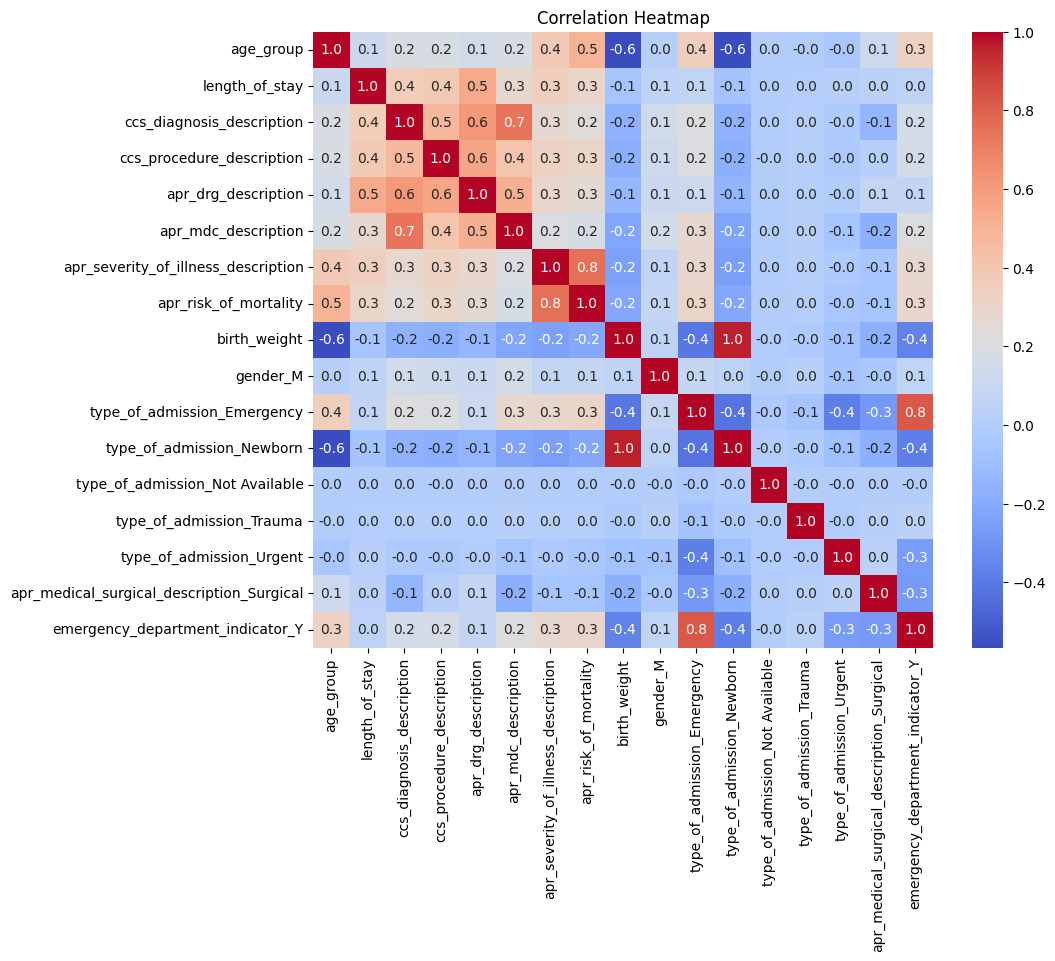

In [34]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

* from the above there high correlaiton = 1 between birth_weight & type_of_admission_Newborn we are going to drop birth weight feature.
* type_of_admission_Emergency & emergency_department_indicator_Y with corr = 0.8 we are going to drop emergency_department_indicator_Y feature.
* apr_severity_of_illness_description & apr_risk_of_mortality corr = 0.8 we are going to drop apr_risk_of_mortality.
* ccs_diagnosis_description have 0.6 and 0.7  positive correlanialty with apr_drg_description, apr_mdc_description respectively we are going to drop apr_drg_description, apr_mdc_description.

In [35]:
# dropping highly correlated feature ['birth_weight','emergency_department_indicator_Y','apr_risk_of_mortality']
df.drop(['birth_weight','emergency_department_indicator_Y','apr_risk_of_mortality','apr_drg_description', 'apr_mdc_description'],axis=1,inplace=True)

In [36]:
#checking for duplication in data after feature encoded. 
df.duplicated().sum()

2138069

In [37]:
# Drop duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

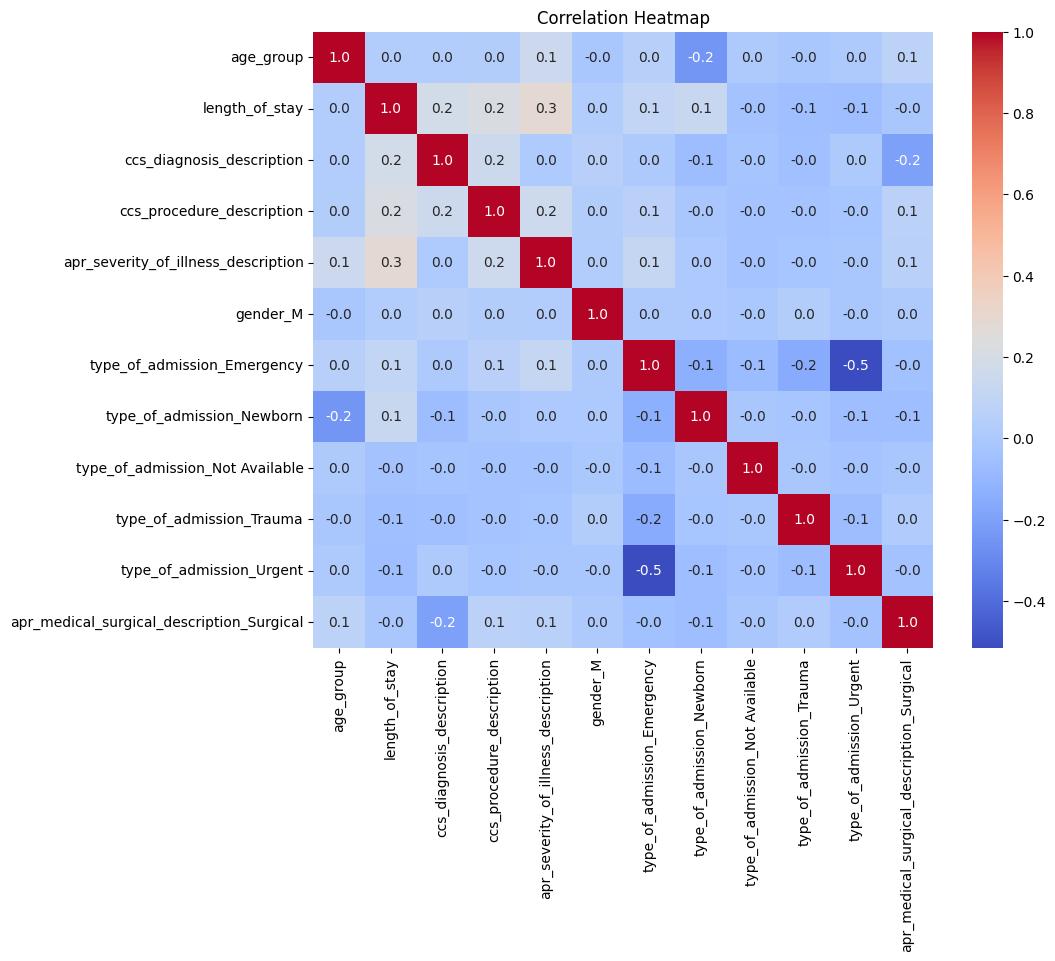

In [40]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# saving data frame in csv file in processed folder for the modeling step.
df.to_csv('../data/processed/processed_data.csv',index=False)

## **Preprocessing Outcomes Summary:**

The main objective of preprocessing and outcomes as follows:

1. Checking the dataset for irrelevant columns that do not serve our prediction model of length of stay and dealing with them.
    - Not all the features serve our aim, as we attempt to create a general model that can predict patient length of stay regardless of the city or state. Additionally, 'total_cost' and 'charges' exceeding 120 days of stay do not make sense to keep. The following columns were removed: ('health_service_area', 'hospital_county', 'operating_certificate_number', 'facility_id', 'facility_name', 'race','ethnicity','zip_code__3_digits', 'patient_disposition', 'payment_typology_1', 'total_charges', 'total_costs', 'over_120_stay').
---   
2. Handling Categorical Variables:
    - First, encoding ordinal features.
    - Second, encoding nominal features:
        1. For features with high cardinality, we used Target Encoding (Mean Encoding) and then dropped them:
            - (ccs_diagnosis_description: 263 unique, ccs_procedure_description: 232, apr_drg_description: 314, apr_mdc_description: 25 unique values).
        2. For features with low cardinality, we used get_dummies to encode them:
            - (gender: 2 unique, type_of_admission: 6, apr_medical_surgical_description: 2, emergency_department_indicator: 2).
---
3. Checking correlation matrices for the target length of stay after encoding the features. The results were as follows:

               - length_of_stay                               1.00
               - apr_drg_description                          0.54
               - ccs_procedure_description                    0.39
               - ccs_diagnosis_description                    0.36
               - apr_severity_of_illness_description          0.35
               - apr_risk_of_mortality                        0.30
               - apr_mdc_description                          0.28
               - age_group                                    0.11
               - type_of_admission_Emergency                  0.07
               - gender_M                                     0.05
               - emergency_department_indicator_Y             0.05
               - apr_medical_surgical_description_Surgical    0.03
               - ethnicity_Not Span/Hispanic                  0.03
               - type_of_admission_Urgent                     0.02
               - type_of_admission_Trauma                     0.01
               - race_Multi-racial                            0.00
               - type_of_admission_Not Available              0.00
               - ethnicity_Unknown                           -0.01
               - race_White                                  -0.01
               - race_Other Race                             -0.02
               - ethnicity_Spanish/Hispanic                  -0.03
               - birth_weight                                -0.06
               - type_of_admission_Newborn                   -0.07


* From the above correlation matrix with length of stay, we noticed that some nominal features had added weight in relation to our target, especially after using the Target Encoding (Mean Encoding) method as described above.
* From the correlation heatmap there high correlaiton = 1 between birth_weight & type_of_admission_Newborn we drop birth weight feature.
* type_of_admission_Emergency & emergency_department_indicator_Y with corr = 0.8 we  drop emergency_department_indicator_Y feature.
* apr_severity_of_illness_description & apr_risk_of_mortality corr = 0.8 we drop apr_risk_of_mortality.
* ccs_diagnosis_description have 0.6 and 0.7  positive correlanialty with apr_drg_description, apr_mdc_description respectively we are going to drop apr_drg_description, apr_mdc_description.
---
4. Saving a dictionary for categorical features that will be needed in the model deployment step.
---
5. After checking for duplication after all of the above process we found 2138069 duplicated value. we drop all of it and rest the index.
---
5. Saving the preprocessed, encoded, and scaled CSV file for the next modeling step.
